<a href="https://colab.research.google.com/github/g-roger/analise-vegetativa-bemagro/blob/main/Oficial_20ia_05_EDA_bemagro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicialização do Projeto

Instalações obrigatórias

In [ ]:
# requirements

!pip install rasterio
!pip install ipygee
!pip install geemap

Importações Iniciais

In [ ]:
# raster imports e básico para análise
import pandas as pd
import rasterio
from rasterio.plot import show, show_hist
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import rasterio.features
import rasterio.warp
from ipygee import*
rasterio.__version__

'1.2.10'

Leitura dos datasets

In [ ]:
# paths

path = 'https://raw.githubusercontent.com/g-roger/analise-vegetativa-bemagro/main/datasets'
dataset_1 = path + '/dataset_1/'
dataset_2 = path + '/dataset_2/'
df_1 = pd.read_csv(dataset_1 + 'DATASET1.csv')
df_2 = pd.read_csv(dataset_2 + 'DATASET2.csv')

In [ ]:
df_1.sort_values(by='Nublado', ascending=False)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
7,2017,1,2017-01-04,"9,52%",colheita,RGB/2017-01-04.tif,NDVI/2017-01-04.tif
16,2017,11,2017-11-15,"6,93%",soja,RGB/2017-11-15.tif,NDVI/2017-11-15.tif
29,2018,12,2018-12-25,"6,34%",colheita,RGB/2018-12-25.tif,NDVI/2018-12-25.tif
44,2020,3,2020-03-19,"6,04%",algodao,RGB/2020-03-19.tif,NDVI/2020-03-19.tif
9,2017,4,2017-04-04,"56,00%",algodao,RGB/2017-04-04.tif,NDVI/2017-04-04.tif
...,...,...,...,...,...,...,...
21,2018,4,2018-04-14,"0,00%",algodao,RGB/2018-04-14.tif,NDVI/2018-04-14.tif
22,2018,5,2018-05-14,"0,00%",algodao,RGB/2018-05-14.tif,NDVI/2018-05-14.tif
23,2018,6,2018-06-18,"0,00%",algodao,RGB/2018-06-18.tif,NDVI/2018-06-18.tif
34,2019,5,2019-05-19,"0,00%",algodao,RGB/2019-05-19.tif,NDVI/2019-05-19.tif


In [ ]:
df_1.head(20)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,7,2016-07-18,"0,00%",algodao,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
3,2016,8,2016-08-07,"0,00%",colheita,RGB/2016-08-07.tif,NDVI/2016-08-07.tif
4,2016,9,2016-09-16,"0,89%",soja,RGB/2016-09-16.tif,NDVI/2016-09-16.tif
5,2016,11,2016-11-25,"13,24%",soja,RGB/2016-11-25.tif,NDVI/2016-11-25.tif
6,2016,12,2016-12-05,"22,73%",soja,RGB/2016-12-05.tif,NDVI/2016-12-05.tif
7,2017,1,2017-01-04,"9,52%",colheita,RGB/2017-01-04.tif,NDVI/2017-01-04.tif
8,2017,2,2017-02-23,"13,08%",algodao,RGB/2017-02-23.tif,NDVI/2017-02-23.tif
9,2017,4,2017-04-04,"56,00%",algodao,RGB/2017-04-04.tif,NDVI/2017-04-04.tif


In [ ]:
df_2

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,5,2016-05-19,"0,00%",algodao,RGB/2016-05-19.tif,NDVI/2016-05-19.tif
3,2016,6,2016-06-28,"0,00%",algodao,RGB/2016-06-28.tif,NDVI/2016-06-28.tif
4,2016,7,2016-07-18,"0,00%",colheita,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
...,...,...,...,...,...,...,...
62,2021,8,2021-08-11,"0,00%",algodao,RGB/2021-08-11.tif,NDVI/2021-08-11.tif
63,2021,9,2021-09-15,"0,00%",colheita,RGB/2021-09-15.tif,NDVI/2021-09-15.tif
64,2021,10,2021-10-15,"0,00%",soja,RGB/2021-10-15.tif,NDVI/2021-10-15.tif
65,2021,11,2021-11-29,"0,00%",soja,RGB/2021-11-29.tif,NDVI/2021-11-29.tif


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   temp ano  66 non-null     int64 
 1   temp mes  66 non-null     int64 
 2   Data      66 non-null     object
 3   Nublado   66 non-null     object
 4   Cultura   66 non-null     object
 5   RGB       66 non-null     object
 6   NDVI      66 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.7+ KB


Analise sobre a volumetria de culturas

In [ ]:
# contagem de imagens de cada uma das culturas:

print(df_1.Cultura.value_counts(),'\n')
print(df_2.Cultura.value_counts())

algodao     34
soja        21
colheita    11
Name: Cultura, dtype: int64 

algodao     35
soja        21
colheita    11
Name: Cultura, dtype: int64


In [ ]:
df_1_culturas = df_1.groupby('Cultura').size().reset_index().sort_values(0, ascending=False)
df_2_culturas = df_2.groupby('Cultura').size().reset_index().sort_values(0, ascending=False)
df_1_culturas.head()

,Cultura,0
0,algodao,34
2,soja,21
1,colheita,11


In [ ]:
df_2_culturas

,Cultura,0
0,algodao,35
2,soja,21
1,colheita,11


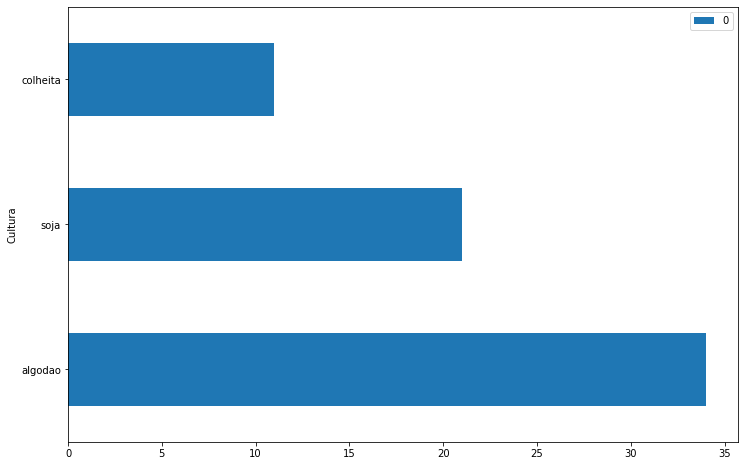

In [ ]:
df_1_culturas.plot.barh(x='Cultura', y=0, figsize=(12,8))

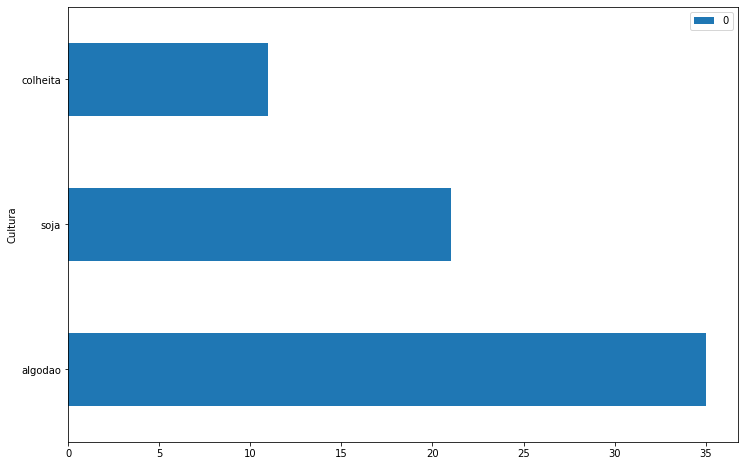

In [ ]:
df_2_culturas.plot.barh(x='Cultura', y=0, figsize=(12,8))

- Ambos os datasets possuem aproximadamente a mesma quantidade de culturas;
- Levando em consideração que cada uma das imagens tem sua data, o tempo a quantidade de plantação de algodão é maior enquanto soja é menor. A colheita é representada 11 vezes em ambos datasets;
- Um ponto que podemos levar em consideração em relação a se uma cultura pode se desenvolver mais no resultado do estudo pode ter um viés para o lado do algodão por ser o que tem mais insumos para estudo

# Exploração NDVI

for # Analise exploratória sobre NDVI para entendimento se lavoura está adiantada ou atrasada

In [ ]:
df_1.head(11)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,7,2016-07-18,"0,00%",algodao,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
3,2016,8,2016-08-07,"0,00%",colheita,RGB/2016-08-07.tif,NDVI/2016-08-07.tif
4,2016,9,2016-09-16,"0,89%",soja,RGB/2016-09-16.tif,NDVI/2016-09-16.tif
5,2016,11,2016-11-25,"13,24%",soja,RGB/2016-11-25.tif,NDVI/2016-11-25.tif
6,2016,12,2016-12-05,"22,73%",soja,RGB/2016-12-05.tif,NDVI/2016-12-05.tif
7,2017,1,2017-01-04,"9,52%",colheita,RGB/2017-01-04.tif,NDVI/2017-01-04.tif
8,2017,2,2017-02-23,"13,08%",algodao,RGB/2017-02-23.tif,NDVI/2017-02-23.tif
9,2017,4,2017-04-04,"56,00%",algodao,RGB/2017-04-04.tif,NDVI/2017-04-04.tif


definindo mapa de cores de índice


In [ ]:

mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['red','green'])

sm = plt.cm.ScalarMappable(cmap=mymap)


In [ ]:
ndvi_images = []

for i in range(0, 7):
    ndvi_images.append(rasterio.open(dataset_1 + df_1['NDVI'][i]))

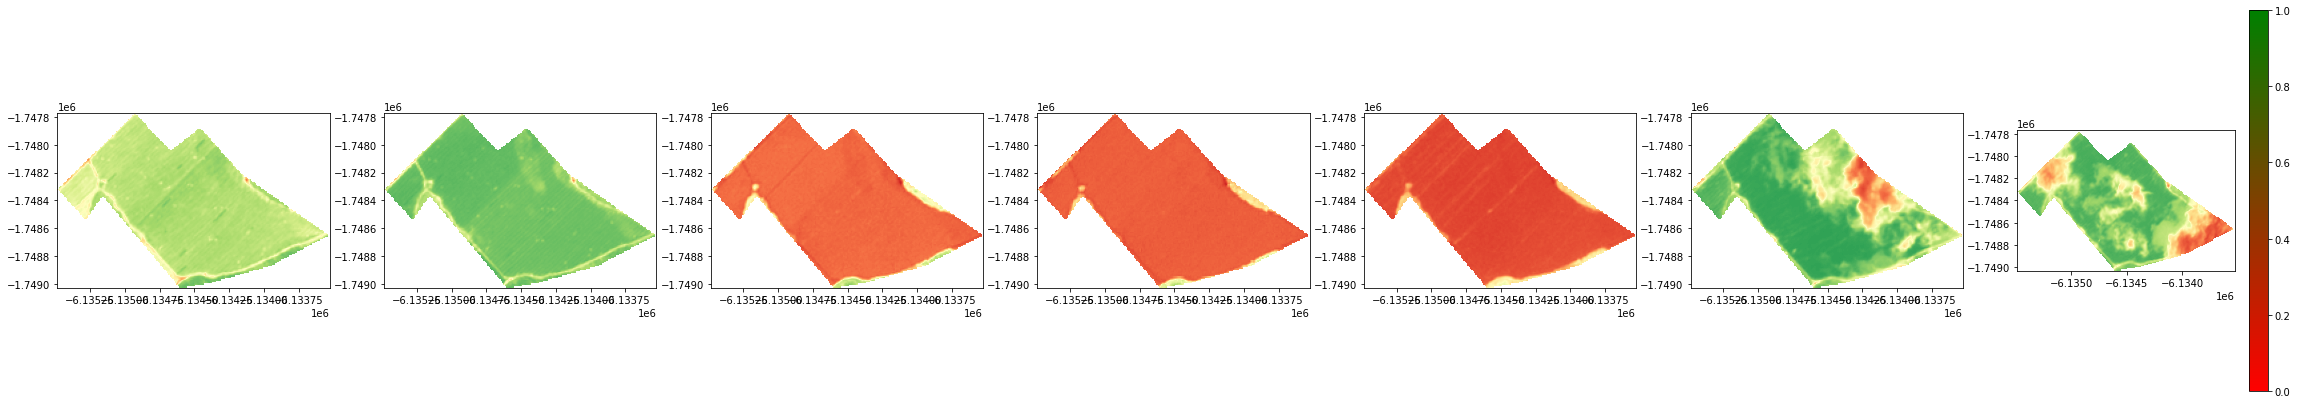

In [ ]:

fig, axes = plt.subplots(1, len(ndvi_images), figsize=(40,7))
for ax, ndvi in zip(axes.flat, ndvi_images):
    show(ndvi, ax=ax, cmap='RdYlGn', vmin=0, vmax=1)

plt.colorbar(sm)
plt.show()

- Observamos que quanto mais vermelha a imagem, mais próxima da colheita.. é um ponto sobre a lavoura estar adiantada?

- será que é caracteristica da cultura "soja" demorar a imagem ficar vermelha. Ou é um indício de atraso da lavoura


In [ ]:
df_1.head(7)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,7,2016-07-18,"0,00%",algodao,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
3,2016,8,2016-08-07,"0,00%",colheita,RGB/2016-08-07.tif,NDVI/2016-08-07.tif
4,2016,9,2016-09-16,"0,89%",soja,RGB/2016-09-16.tif,NDVI/2016-09-16.tif
5,2016,11,2016-11-25,"13,24%",soja,RGB/2016-11-25.tif,NDVI/2016-11-25.tif
6,2016,12,2016-12-05,"22,73%",soja,RGB/2016-12-05.tif,NDVI/2016-12-05.tif


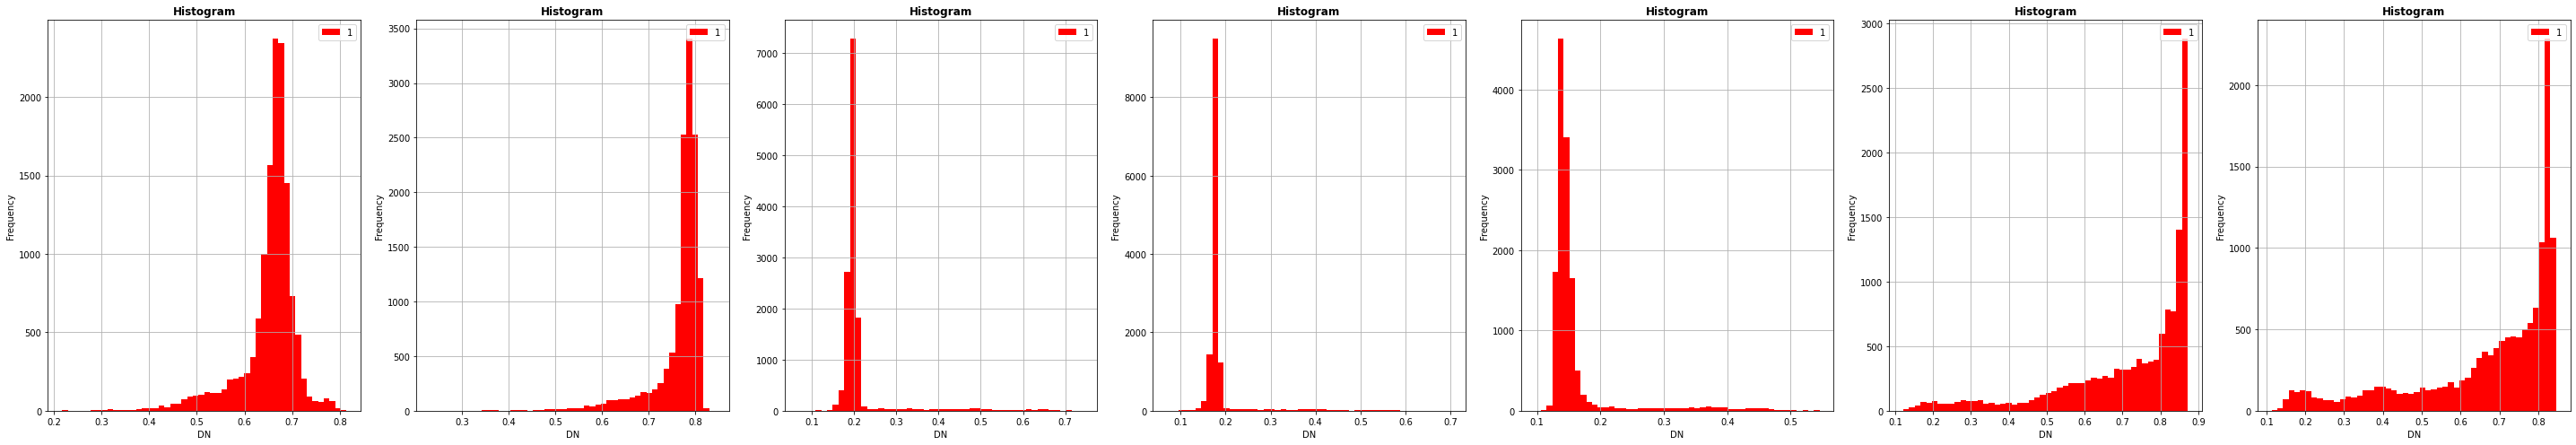

In [ ]:

fig, axes = plt.subplots(1, len(ndvi_images), figsize=(40,7))
for ax, ndvi in zip(axes.flat, ndvi_images):
    show_hist(ndvi, ax=ax, bins=50, stacked=False, histtype='stepfilled', title="Histogram")

fig.tight_layout()

Considerando olhares do grupo e dos professores que nos orientaram, entendemos que essa lavoura observando alguns NDVI's aparentemente segue um passo normal, com algumas regiões adiantadas e outras atrasadas, os histogramas nos indicam quando uma região pode estar próxima da colheita ou não.

# Analise exploratória sobre RGB para entendimento se possuí áreas de subdesenvolvimento

In [ ]:
rgb_images = []

for i in range(0, 7):
    rgb_images.append(rasterio.open(dataset_1 + df_1['RGB'][i]))

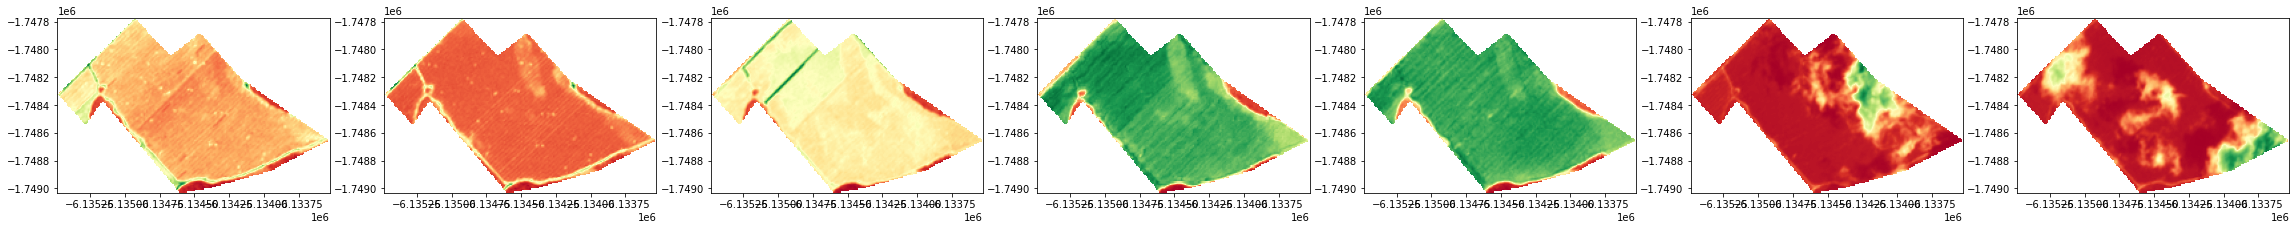

In [ ]:

fig, axes = plt.subplots(1, len(rgb_images), figsize=(40,7))
for ax, rgb in zip(axes.flat, rgb_images):
    show(rgb, ax=ax, cmap='RdYlGn')

plt.show()

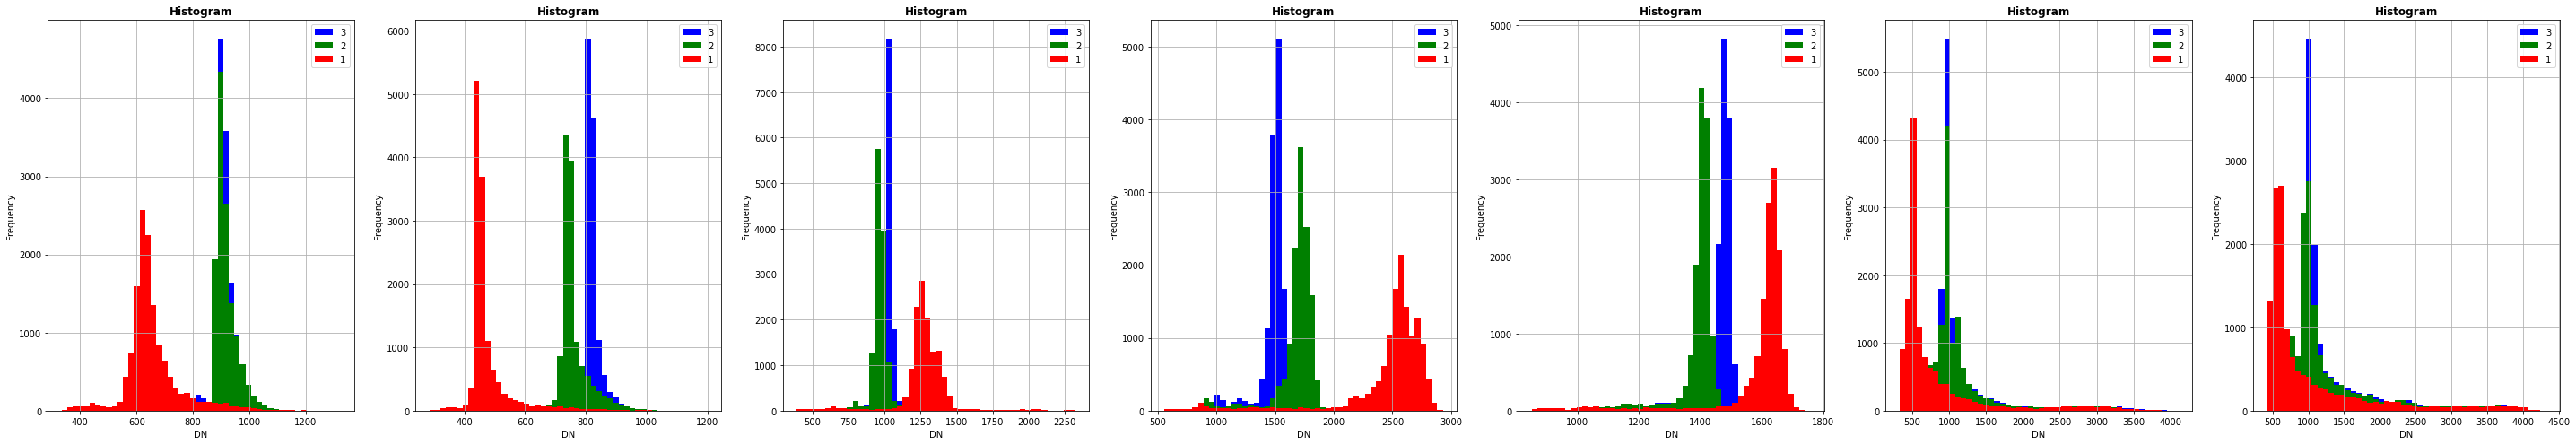

In [ ]:

fig, axes = plt.subplots(1, len(rgb_images), figsize=(40,7))
for ax, rgb in zip(axes.flat, rgb_images):
    show_hist(rgb, ax=ax, bins=50, stacked=False, histtype='stepfilled', title="Histogram")

fig.tight_layout()

Nas bandas rgb nos deu mais insumo para entender o que pode ser cada área de mais produtividade, não produtividade ou nuvem (ruído)

## Resumo do que estudamos até então

As explorações dos itens acima nos fez entender que precisavamos separar algumas zonas, a partir dessas zonas extrair seus dados e usá-los como fonte para estudo. O que foi interessante que a exploração foi com base numa amostra.


## Resumo do que terá a seguir

A seguir, o estudo vai avançar para segmentarmos e classificarmos com um algoritmo e com isso obter a média contorno de cada região;
A ideia é após ter a média de cada região, fazer uma média geral e com isso aplicar isso a todas as imagens e entender a evolução das áreas de produtividade pelos pixel

# Insumo para estudo (SEGMENTAÇÃO DE SUPERPIXELS)

Através da exploração das colorações dos NDVIS e seus histogramas, chegamos a um consenso de segmentar os setores das imagens e classifica-los de algumas forma, os estudos indicaram utilizar algoritmos não supervisionados superpixels para segmentar

Algumas tecnicas serão utilizadas através de alguns algoritmos como Slic que utiliza Kmeans e Quickshift que tambem se baseia em aproximação de kernel;


## QuickShift

Quickshift is a relatively recent 2D image segmentation algorithm, based on an approximation of kernelized mean-shift. Therefore it belongs to the family of local mode-seeking algorithms and is applied to the 5D space consisting of color information and image location 2.

One of the benefits of quickshift is that it actually computes a hierarchical segmentation on multiple scales simultaneously.

Quickshift has two main parameters: sigma controls the scale of the local density approximation, max_dist selects a level in the hierarchical segmentation that is produced. There is also a trade-off between distance in color-space and distance in image-space, given by ratio.

2 Quick shift and kernel methods for mode seeking, Vedaldi, A. and Soatto, S. European Conference on Computer Vision, 2008


## Slic

This algorithm simply performs K-means in the 5d space of color information and image location and is therefore closely related to quickshift. As the clustering method is simpler, it is very efficient. It is essential for this algorithm to work in Lab color space to obtain good results. The algorithm quickly gained momentum and is now widely used. See 3 for details. The compactness parameter trades off color-similarity and proximity, as in the case of Quickshift, while n_segments chooses the number of centers for kmeans.





Para as seguintes experimentações estamos utilizando a lib skimage ao invés de rasterio

In [ ]:
from skimage.segmentation import quickshift, slic, morphological_geodesic_active_contour, inverse_gaussian_gradient
from skimage import io
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.filters import sobel
from skimage.color import rgb2gray
from cv2 import cv2
from skimage.measure import regionprops, regionprops_table, moments
from matplotlib.lines import Line2D


Vamos utilizar apenas uma imagem inicialmente para entendimento dos algoritmos e depois disso aplicar no restante.

In [ ]:
# Leitura RGB
img = io.imread(dataset_1 + df_1['RGB'][0])
img.shape

(132, 205, 3)

In [ ]:
# Leitura NDVI
img_n = io.imread(dataset_1 + df_1['NDVI'][0])
img_n.shape

(132, 205)

In [ ]:
# Para utilizar uma imagem NDVI no quickshift preciso criar 3 canais
img2 = np.zeros( ( np.array(img_n).shape[0], np.array(img_n).shape[1], 3 ) )
img2[:,:,0] = img_n
img2[:,:,1] = img_n
img2[:,:,2] = img_n

In [ ]:
img2.shape

(132, 205, 3)

## Utilizando algoritmos superpixels 

Abaixo será realizado um teste utilizando alguns algoritmos para entendermos os resultados e compará-los

In [ ]:
segments_quickshift = quickshift(img2)
print("Quickshift número de segmentos: %d" % len(np.unique(segments_quickshift)))

Quickshift número de segmentos: 20


In [ ]:
segments_slic = slic(img2, n_segments=21, compactness=0.9, sigma=0.2,
                     start_label=1)
print("Slic número de segmentos: %d" % len(np.unique(segments_slic)))
print("Size: ", segments_slic.size)

Slic número de segmentos: 12
Size:  27060


In [ ]:
gradient = sobel(rgb2gray(img2))
print("Gradient número de segmentos: %d" % len(np.unique(gradient)))

Gradient número de segmentos: 14143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Gradient')

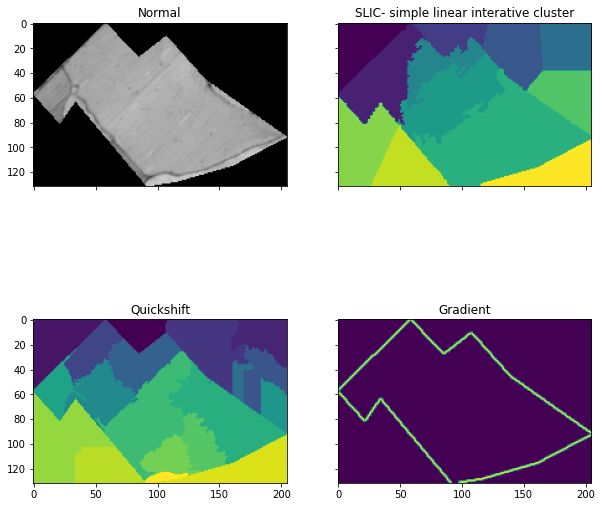

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 0].imshow(img2)
ax[0, 0].set_title("Normal")
ax[0, 1].imshow(segments_slic)
ax[0, 1].set_title('SLIC- simple linear interative cluster')
ax[1, 0].imshow(segments_quickshift)
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(gradient)
ax[1, 1].set_title('Gradient')

Observando os resultados obtidos, vamos seguir com a segmentação quickshift, pois ele de forma automática consegue nos dizer o kernel, é similar ao mean shift e consegue classificar os clusters dos pixels por suas cores e junção dos dados espaciais.


NDVI deu um resultado de segmentação próximo ao RGB, buscando o motivo entendemos que é pq o quickshift acaba trabalhando com o canal rgb.

Até este momento utilizamos o site https://scikit-image.org/ para insumo dos estudos

# Estudo de contornos

Conseguimos até então segmentar, porém o contorno é útil pois precisamos entender como extrair a média dos mesmo com base em foruns de entendimento de evolução de uma imagem de satélite.

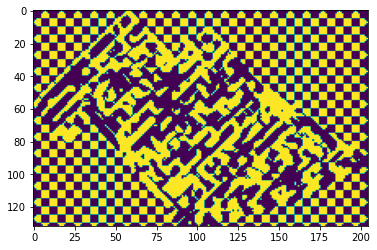

In [ ]:
# Estudo de contornos
morph_test = morphological_geodesic_active_contour(img_n, 2, 'checkerboard')
plt.imshow(morph_test)

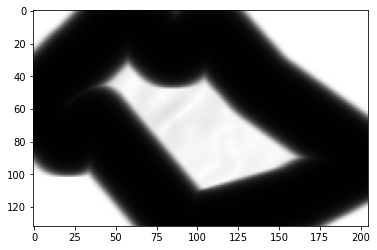

In [ ]:
# Estudo de contornos
ig = inverse_gaussian_gradient(img2)
plt.imshow(ig)

# Criação de Novos datasets 

Abaixo estudando a biblioteca scikit image, entendemos como criar um novo dataset com os dados detalhados da imagem.

In [ ]:
# Acessando cada um dos segmentos
# https://scikit-image.org/docs/dev/api/skimage.measure.html

props = pd.DataFrame(regionprops_table(segments_quickshift, img2))
props

,label,bbox-0,bbox-1,bbox-2,bbox-3
0,1,0,0,57,58
1,2,0,159,39,205
2,3,0,107,61,174
3,4,0,24,53,73
4,5,21,170,77,205
5,6,11,60,63,121
6,7,33,161,67,178
7,8,50,142,52,143
8,9,32,25,90,85
9,10,47,184,92,205


In [ ]:
# labels das áreas da
segments_ids = np.unique(segments_quickshift)
segments_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
# pontos centrais da imagem
centers = np.array([np.mean(np.nonzero(segments_quickshift==i),axis=1) for i in segments_ids])


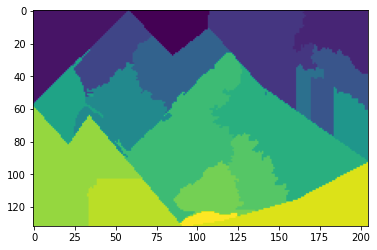

In [ ]:
plt.imshow(segments_quickshift)

# Classificação de pixels

Abaixo conseguimos entender como a partir de um NDVI separar e classificar suas áreas. O algoritmo de superpixel nos ajudou nessa segmentação e conseguimos com uma imagem já dizer se é uma zona produtiva ou não.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


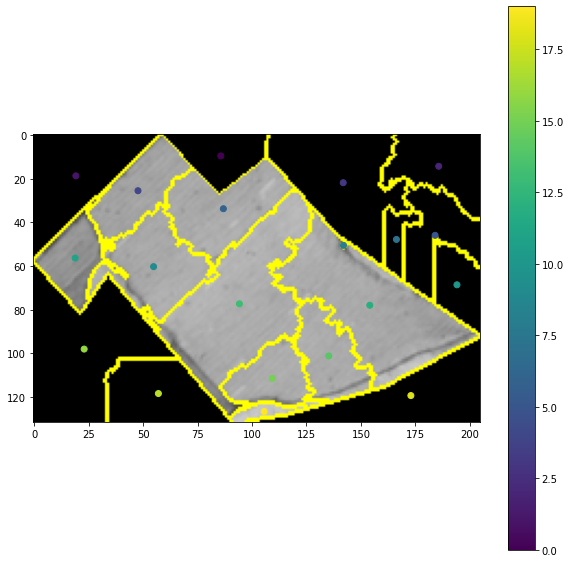

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(mark_boundaries(img2, segments_quickshift))
plt.scatter(centers[:,1],centers[:,0], c=segments_ids)

cb = plt.colorbar()


Entendendo que o algoritmo usa os vizinhos para buscar classificar, estamos a seguir realizando um check para saber como os vizinhos se encontram

In [ ]:
# Criação de variáveis para entender quem é o vizinho de quem

right = np.vstack([segments_quickshift[:,:-1].ravel(), segments_quickshift[:,1:].ravel()])
below = np.vstack([segments_quickshift[:-1,:].ravel(), segments_quickshift[1:,:].ravel()])
neighbors = np.unique(np.hstack([right, below]), axis=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


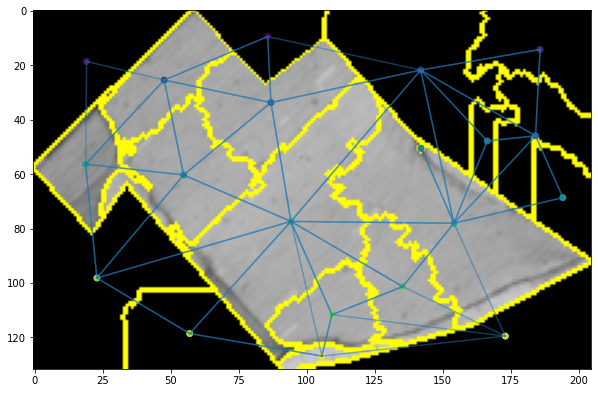

In [ ]:
# Como são conectados os Pontos?

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(mark_boundaries(img2, segments_quickshift))
plt.scatter(centers[:,1],centers[:,0], c=segments_ids)


for i in range(neighbors.shape[1]):
    y0,x0 = centers[neighbors[0,i]]
    y1,x1 = centers[neighbors[1,i]]

    l = Line2D([x0,x1],[y0,y1], alpha=0.5)
    ax.add_line(l)

A detecção do contorno permite definir propriedades como
perímetro e forma do objeto em uma representação concisa,
mas não é de simples determinação, devido a grande variação
de condições de iluminação das imagens reais;




# Solução para entender áreas produtivas ou não produtivas

- criar loop para coordenadas X e Y [x, y] e investigar média de itensidade de pixels a partir de um contorno, e assim tentar entender o que é produtivo, improdutivo e nuvem

In [ ]:
def mean_pixels(regionmask, intensity):
     return np.mean(intensity[regionmask])
# Algumas propriedades extras foram colocadas no dataframe, assim como a média do contorno de itensidade de pixels

props_df = pd.DataFrame(regionprops_table(segments_quickshift, img2, properties=['label', 'centroid', 'orientation', 'bbox', 'coords', 'solidity'], extra_properties=(mean_pixels,)))
props_df

,label,centroid-0,centroid-1,orientation,bbox-0,bbox-1,bbox-2,bbox-3,coords,solidity,mean_pixels
0,1,18.586207,19.086207,-0.811262,0,0,57,58,"[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5...",0.991745,-9999.000000
1,2,14.187663,185.729800,1.264091,0,159,39,205,"[[0, 166], [0, 167], [0, 168], [0, 169], [0, 1...",0.800974,-9999.000000
2,3,21.736142,141.860754,0.841750,0,107,61,174,"[[0, 108], [0, 109], [0, 110], [0, 111], [0, 1...",0.868310,-9999.000000
3,4,25.419833,47.623726,-0.742629,0,24,53,73,"[[0, 58], [1, 57], [1, 58], [1, 59], [2, 56], ...",0.872272,0.626725
4,5,45.900000,184.056075,-0.232685,21,170,77,205,"[[21, 172], [22, 172], [22, 173], [23, 172], [...",0.706737,-9999.000000
5,6,33.683246,86.839660,-1.197282,11,60,63,121,"[[11, 107], [12, 105], [12, 106], [12, 107], [...",0.794592,0.665651
6,7,47.790850,166.300654,-0.135282,33,161,67,178,"[[33, 163], [34, 162], [34, 163], [34, 164], [...",0.709977,-9999.000000
7,8,50.500000,142.000000,0.000000,50,142,52,143,"[[50, 142], [51, 142]]",1.000000,0.220272
8,9,60.290510,54.771465,1.434937,32,25,90,85,"[[32, 57], [32, 58], [33, 57], [33, 58], [33, ...",0.728598,0.659710
9,10,68.615385,194.096531,0.319421,47,184,92,205,"[[47, 184], [48, 184], [48, 185], [49, 184], [...",0.960870,-9999.000000


Removendo ruído, áreas externas do dataset

In [ ]:
props_df = props_df.query('mean_pixels >= 0')

In [ ]:
props_df

,label,centroid-0,centroid-1,orientation,bbox-0,bbox-1,bbox-2,bbox-3,coords,solidity,mean_pixels
3,4,25.419833,47.623726,-0.742629,0,24,53,73,"[[0, 58], [1, 57], [1, 58], [1, 59], [2, 56], ...",0.872272,0.626725
5,6,33.683246,86.839660,-1.197282,11,60,63,121,"[[11, 107], [12, 105], [12, 106], [12, 107], [...",0.794592,0.665651
7,8,50.500000,142.000000,0.000000,50,142,52,143,"[[50, 142], [51, 142]]",1.000000,0.220272
8,9,60.290510,54.771465,1.434937,32,25,90,85,"[[32, 57], [32, 58], [33, 57], [33, 58], [33, ...",0.728598,0.659710
10,11,56.327869,18.757611,-0.233628,24,0,82,43,"[[24, 34], [25, 33], [26, 32], [27, 31], [28, ...",0.634944,0.534212
11,12,78.018030,154.080489,0.919923,32,108,117,205,"[[32, 126], [33, 127], [34, 127], [34, 128], [...",0.798252,0.653159
12,13,77.350905,94.195571,-0.543040,26,50,130,128,"[[26, 118], [26, 119], [26, 120], [26, 121], [...",0.728636,0.668267
13,14,101.287923,135.250242,0.435413,75,119,123,157,"[[75, 129], [76, 125], [76, 126], [76, 128], [...",0.818182,0.664985
14,15,111.624009,109.245753,-1.444082,92,86,127,136,"[[92, 115], [93, 113], [93, 114], [93, 115], [...",0.783496,0.662740
18,19,126.805714,105.554286,-1.439653,123,90,132,125,"[[123, 103], [123, 104], [123, 105], [123, 106...",0.853659,0.761869


Vamos extrair uma média geral dessa área

In [ ]:
props_df.mean_pixels.mean()

0.6117589362593769

Avaliando que nosso critério será que acima de 50% é uma zona produtiva.


Os critérios que levamos em consideração são:
- menor de 50% lavoura improdutiva
- maior que 50% lavoura produtiva
- se o mesmo tiver acima de 70% tende a ser uma área adiantada
- menor que 30% atrasada

# Aplicando a todas as imagens

In [ ]:
len(df_1['NDVI'])

66

In [ ]:
data = {
    'image_label': [],
    'mean_itensity_border_pixels': []
}

In [ ]:
# Leitura NDVI
for i in range(len(df_1['NDVI'])):
    try:
        img_ndvi = io.imread(dataset_1 + df_1['NDVI'][i])

        img_n_3_bands = np.zeros( ( np.array(img_ndvi).shape[0], np.array(img_ndvi).shape[1], 3 ) )
        img_n_3_bands[:,:,0] = img_ndvi
        img_n_3_bands[:,:,1] = img_ndvi
        img_n_3_bands[:,:,2] = img_ndvi

        segments_quickshift = quickshift(img_n_3_bands)

        props_df = pd.DataFrame(regionprops_table(segments_quickshift, img_n_3_bands, properties=['label', 'centroid', 'orientation', 'bbox', 'coords', 'solidity'], extra_properties=(mean_pixels,)))

        props_df = props_df.query('mean_pixels >= 0')

        _mean = props_df.mean_pixels.mean()
        label = df_1['NDVI'][i].split('.')[0].split('NDVI/')[1]
        print(label, _mean)

        data['image_label'].append(_mean)
        data['mean_itensity_border_pixels'].append(label)
    except:
        print('Não encontrado', df_1['NDVI'][i])
        continue

2016-03-30 0.6117589362593769
2016-04-29 0.7353234963474953
2016-07-18 0.2997281157351788
2016-08-07 0.2514549452990232
2016-09-16 0.21207136483340427
2016-11-25 0.5630586473079519
2016-12-05 0.6216042225557235
2017-01-04 0.41683086817314147
2017-02-23 0.320157717425291
2017-04-04 0.4811207493654067
2017-05-14 0.6380545410451968
2017-06-03 0.6373823287969835
2017-07-13 0.4155503328225993
2017-08-17 0.30370630179737285
2017-09-11 0.28441811110140125
2017-10-16 0.2579129994666307
2017-11-15 0.5190961879036646
2017-12-20 0.6440211537669492
2018-01-24 0.2938728171905592
2018-02-18 0.3409877839347024
Não encontrado NDVI/2018-03-20.tif
2018-04-14 0.7225349650647033
2018-05-14 0.7078097405810512
2018-06-18 0.6066970224568726
2018-07-18 0.4533985102128665
2018-08-17 0.326708849367157
2018-09-21 0.1937926474389709
2018-10-26 0.5605552144847848
2018-11-15 0.4286369058978435
2018-12-25 0.37000842116555965
2019-01-24 0.30947697682173264
2019-02-03 0.42964461624028116
2019-03-10 0.5257937950253023


In [ ]:

new_image_analyses_mean_pixels = pd.DataFrame(data)

In [ ]:
new_image_analyses_mean_pixels.head()

,image_label,mean_itensity_border_pixels
0,0.611759,2016-03-30
1,0.735323,2016-04-29
2,0.299728,2016-07-18
3,0.251455,2016-08-07
4,0.212071,2016-09-16


# Resultado final (Gráfico de linhas com o desenvolvimento de cada área por mean shift das imagens)

Segue a sequência feito com RGB e NDVI afim de comparação

In [ ]:
import seaborn as sns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 <a list of 65 Text major ticklabel objects>)

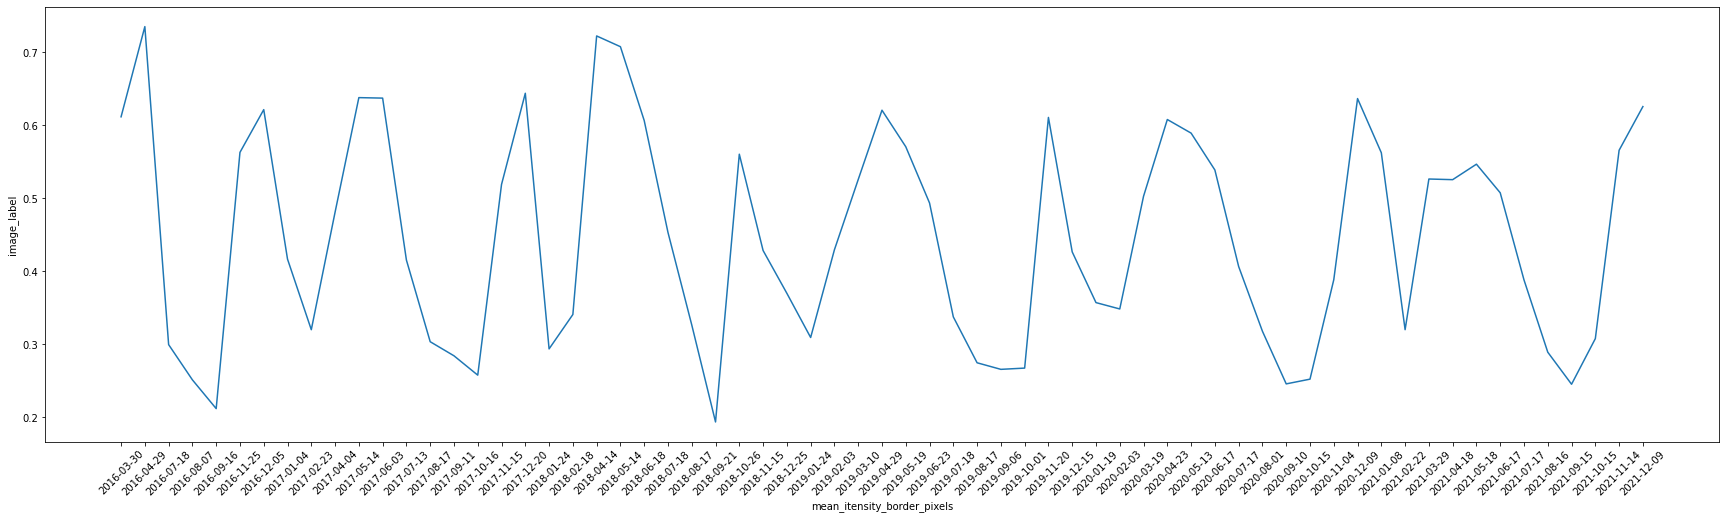

In [ ]:
ax = sns.lineplot(y=new_image_analyses_mean_pixels.image_label, x=new_image_analyses_mean_pixels.mean_itensity_border_pixels)
ax.figure.set_size_inches(30, 8)
plt.xticks(rotation=45)

conforme é menor que 50% é possível entender que isso pode ser uma troca de cultura.

Observando esse gráfico é possível entender com os picos que se inicia a lavoura adiantada em alguns períodos como inicio de 2016 e inicio de 2018 e com o tempo vai normalizando. Porém nos inícios de anos sempre observamos um pico e o mesmo vai descendo conforme chega o final dos anos

Entendemos aqui como é a produtividade e improdutividade de cada uma das imagens analisadas.




In [ ]:
data2 = {
    'image_label': [],
    'mean_itensity_border_pixels': []
}

In [ ]:
# Leitura NDVI
for i in range(len(df_2['NDVI'])):
    try:
        img_ndvi = io.imread(dataset_1 + df_2['NDVI'][i])

        img_n_3_bands = np.zeros( ( np.array(img_ndvi).shape[0], np.array(img_ndvi).shape[1], 3 ) )
        img_n_3_bands[:,:,0] = img_ndvi
        img_n_3_bands[:,:,1] = img_ndvi
        img_n_3_bands[:,:,2] = img_ndvi

        segments_quickshift = quickshift(img_n_3_bands)

        props_df = pd.DataFrame(regionprops_table(segments_quickshift, img_n_3_bands, properties=['label', 'centroid', 'orientation', 'bbox', 'coords', 'solidity'], extra_properties=(mean_pixels,)))

        props_df = props_df.query('mean_pixels >= 0')

        _mean = props_df.mean_pixels.mean()
        label = df_2['NDVI'][i].split('.')[0].split('NDVI/')[1]
        print(label, _mean)

        data2['image_label'].append(_mean)
        data2['mean_itensity_border_pixels'].append(label)
    except:
        print('Não encontrado', df_2['NDVI'][i])
        continue

2016-03-30 0.6117589362593769
2016-04-29 0.7353234963474953
Não encontrado NDVI/2016-05-19.tif
Não encontrado NDVI/2016-06-28.tif
2016-07-18 0.2997281157351788
2016-08-07 0.2514549452990232
2016-09-16 0.21207136483340427
Não encontrado NDVI/2016-10-26.tif
2016-12-05 0.6216042225557235
2017-01-04 0.41683086817314147
2017-02-23 0.320157717425291
2017-04-04 0.4811207493654067
2017-05-14 0.6380545410451968
2017-06-03 0.6373823287969835
2017-07-13 0.4155503328225993
2017-08-17 0.30370630179737285
2017-09-11 0.28441811110140125
2017-10-16 0.2579129994666307
2017-11-15 0.5190961879036646
2017-12-20 0.6440211537669492
2018-01-24 0.2938728171905592
Não encontrado NDVI/2018-02-28.tif
Não encontrado NDVI/2018-03-30.tif
Não encontrado NDVI/2018-04-24.tif
Não encontrado NDVI/2018-05-24.tif
Não encontrado NDVI/2018-06-13.tif
2018-07-18 0.4533985102128665
2018-08-17 0.326708849367157
Não encontrado NDVI/2018-09-11.tif
Não encontrado NDVI/2018-10-16.tif
Não encontrado NDVI/2018-11-10.tif
Não encontrad

In [ ]:

new_image_analyses_mean_pixels2 = pd.DataFrame(data2)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text major ticklabel objects>)

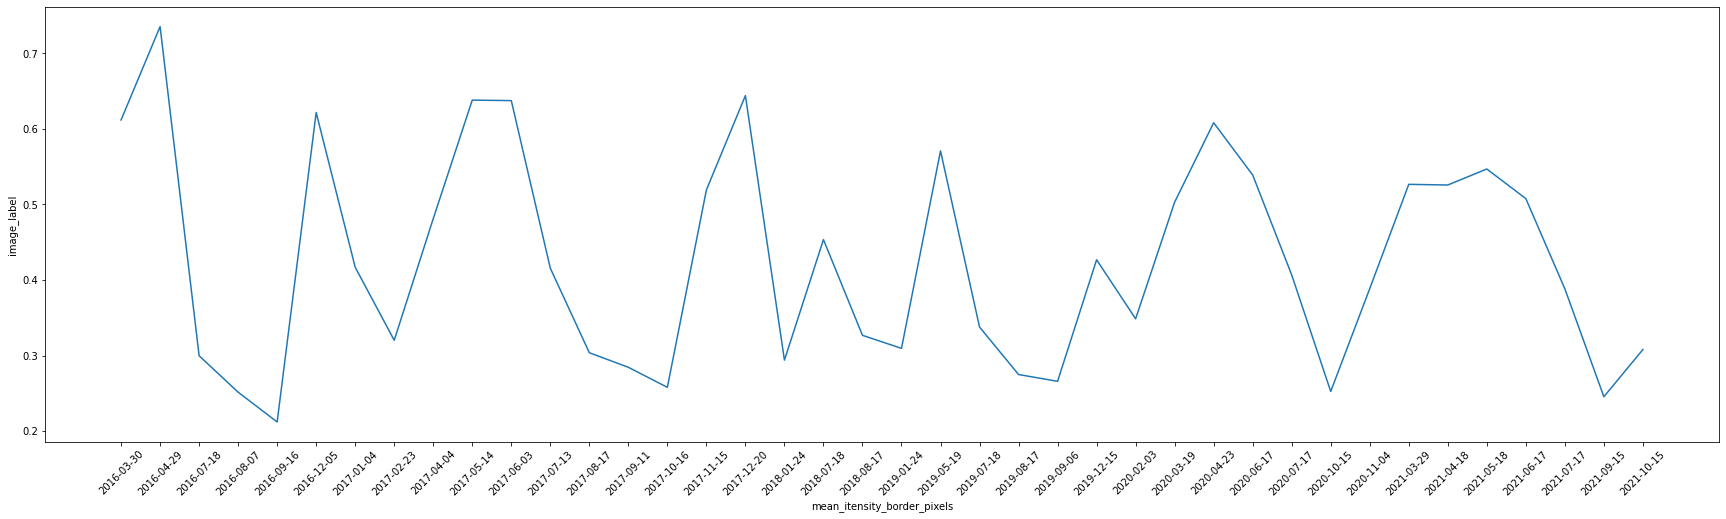

In [ ]:
ax = sns.lineplot(y=new_image_analyses_mean_pixels2.image_label, x=new_image_analyses_mean_pixels2.mean_itensity_border_pixels)
ax.figure.set_size_inches(30, 8)
plt.xticks(rotation=45)

conforme é menor que 50% é possível entender que isso pode ser uma troca de cultura.

# Conclusão
Desse modo ambos os algorítmos chegaram a um resultado que podemos comparar cada uma das imagens com base nas suas cores de itensidade e com isso notar uma possível troca de cultura e padrão.

seguindo este padrão:

Avaliando que nosso critério será que acima de 50% é uma zona produtiva.

Os critérios que levamos em consideração são:

- menor de 50% lavoura improdutiva
- maior que 50% lavoura produtiva
- se o mesmo tiver acima de 70% tende a ser uma área adiantada
- menor que 30% atrasada